# Process Models, Statistical Models, and how to win big

What do you have in mind when you think about models or mdeling? In my experience, students coming into my seminar on model building fall into one of two camps. One group thinks about questions related to statistical modeling and inference: assuming we have some data, what is the best statistical model to represent the data? What tools or methods are available for determining, or estimating, the correct values of parameters, given the data (for example: the mean and standard deviation)? The second camp thinks of something else entirely: a model is a simple, precisely defined, system that produces the behavior under consideration. Whether these things are the same or not, and how they relate to each other is not trivial. My goal for now is more modest: to illustrate the two notions, so that people familiar with one will understand what the people in the other camp have in mind, and that those new to modeling altogether will have some idea of the two kinds of work.

As a first approximation, think of the first endeavor as having to do with data analysis. We begin by having some vage notion about the phenomenon, for example that heights in a population have a normal distribution. We want to know the best guess about the average height in the population and the spread (how fat the distribution is), given a sample of people from the population. Another common example: we want to determine how two variables, such as height and weight, are related. We use a statistical tool such as linear regresssion to determine the best line that captutres the relation between the two.

The second endeavor may sound more exciting. Certainly, more "philosophical": we want to _explain_ some phenomenon (or maybe to *understand* it; I am not going to dicuss the distinction between the two). Here, we will often be insterested in questions like: how is this phenomenon even possible (i.e., what simple model will lead to the result that we are trying to explain)? What mininal set of assumptions is sufficient? and so on. Some of the things we will discuss during the semester fall naturally into this category. For example, how can communication systems emerge, without prior agreement and thus communication? How can cooperation emerge among selfish agents? Do we have to assume prejudice to explain urban segregation? To address questions like these we will often construct a model and simulate it on the computer, to determine if it produces results that (qualitatively) resemble the phenomenon we are after.

How the two endevaors are related is, as I said, not a trivial question. For now, you can think about the first class of models as top-down models or as stastitical models of data, and of the models that belong to the second class as explanatory, or bottom-up models. McElreath refers to such models as _process models_.  I am not interested here in making this distinction robust (I am not sure it is); rather, I want to illustrate the two kinds of modeling work. We start by explaining where normal distibutions, so common in nature, are from. 


# Where does the Normal Distribution come from

Eveyone knows that almost everything is normally distributed. Far fewer people have any idea _why_. One might ask how the normal distribution arises, hoping to find a well defined process that leads to a normal distribtion. Put differently, one is asking for a model system. Note, however, that this very question can also be understood differently, as a question about the formal, mathematical conditions, that ensure a normal distribution. In this formulation, the desired end result is a mathematical proof that given these conditions the normal distribution arises. As I said, here is not the place to delve into this distinction. But keep it mind. For the time being our goal is simply to learn when (or why? or how?) the normal distribution arises... Not knowing the answer to this was arguably the source of Rube Goldberg-like metaphysical confusions in the past, perhaps giving rise to the discipline of sociology and providing support for racism. But this part of the story is for another time.

Most of what I will now describe is explored in more depth in the following texts:

* Page, Scott E. 2018. _The Model Thinker: What You Need to Know to Make Data Work for You_. New York: Basic Books. Chpater 5.
* McElreath, Richard. 2015. _Statistical Rethinking: A Bayesian Course with Examples in R and Stan._ 1 edition. Boca Raton: Chapman and Hall/CRC. Chapter 4.

I used the Python translation of the code in McElreath's book from [here](https://github.com/pymc-devs/resources/tree/master/Rethinking).

## Addition processes

Probably the most enticing way to get a normal distribution is to use a mechanical device called the quincunx. This is essentially a grid of nails through which balls being released form the top fall. The resulting stacks of balls follow a normal distribution. Click the link below to see it in action.

[Video clip](https://upload.wikimedia.org/wikipedia/commons/d/dc/Galton_box.webm)


The quincunx is a physical, material, model. It models a process in which at each stage a ball may be tilted either to the left or to the right with equal probability. Since many such events 
happen until a ball reaches the bottom, most of them cancel out; hence, the tallest pile is in the middle. Slightly less often they _almost_ cancel out, giving slightly less tall piles around the middle, and so on as we get further and further away. Here is one way of representing _this_ model in computer code. We model 16 events of the ball hitting a nail by generating  a list of 16 random numbers
between -1 and 1. These are the individual steps. Summing these numbers we get the final location of the ball after 16 steps. We repeat this process for a 1000 balls to see the distribution of many balls all undergoing the same process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

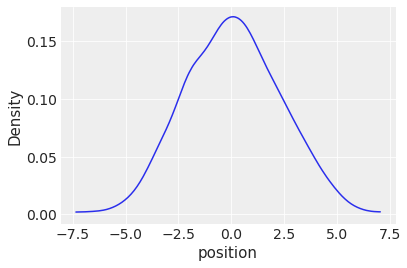

In [2]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
az.plot_kde(pos)
plt.xlabel('position')
plt.ylabel('Density');

Well! This looks roughly like a Normal Distribution. Try varying the 16 and the 1000. Can you improve the result? Can you guess before trying which of them will improve the result more?

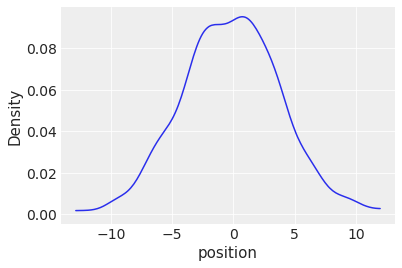

In [3]:
pos = np.random.uniform(-1, 1, size=(50, 1000)).sum(0)
az.plot_kde(pos)
plt.xlabel('position')
plt.ylabel('Density');

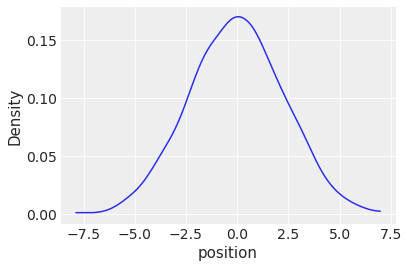

In [4]:
pos = np.random.uniform(-1, 1, size=(16, 3000)).sum(0)
az.plot_kde(pos)
plt.xlabel('position')
plt.ylabel('Density');

There are some philosophical questions that already pop up and that I am going to table for now. In what sense is the quincunx a _model_? Is the computer code a model, or a _specification_ of a model? What epistmeic status should we give the simulation (is it like preforming an _experiment_ or is it more like producing logical _inferences_?) And many more. What I want you to focus on for now is that the code and the quincunx both showed us an underyling, micro-process that can end up with a result that is close to (best represented by?) a normal distribution. The Normal Distribution has been demistifyed. The conclusion is important enough to warrant boldface: **Any process that adds together random values from the same distribution converges to a normal distribution.** (see McElreath, sec. 4.1).

In other words, if we see a normal distribution we might wonder if it is a result of adding up multiple small events. Also: if we have a model that seems to consist of adding up multiple random values, we can expect the result to be normally distributed. Page gives a couple of examples. If multiple genes additively contribute to height, we can expect height to be distributed normally. Another example he discusses is household expenditures. Total expenditure on consumer goods is simply the sum of the amounts individuals spend, hence it should be normally distributed. Many simplifications are involved, of course (are they or are they not part of "the model"?).

It is important to realize what the little model and simulation producing a normal distribution by summing random variable does not do. It does not aim to tell us the mean or standard deviation of heights, expenditures, or what have you. It is not in the business of doing that; it is a mistake to complain that it does not provide that kind of information. Indeed, by not thinking about these details the model helps us understand one way that the normal distribution *may* arise. It is conceptual and qualitative rather than data driven and quantitative. It is explanatory, not predictive. 

To paraphrase James Black's Nobel Lecture, a model of this kind is best not thought of as a pathetic description of nature. Rather, it is an accurate description of  of our pathetic (as in idealized) thinking about nature. 

The model so far discussed gives us sufficient conditions leading to a normal distribution. But having a model display a particular pattern we seek to explain does not, on its own, show that it  is the only way to get that result (but what if it was the only way we could come up with for producing a pattern of intertest?). 

## Multiplication processes

Multiplying small numbers produces results that are almost equal to addition. Hence, **multiplying small random values will also produce a normal distribution**. As a concrete example think of multiple genes each producing a 1% increase in the height of an organism (thus, they do not each independently add a specific number of centimeters of height; they are interacting).

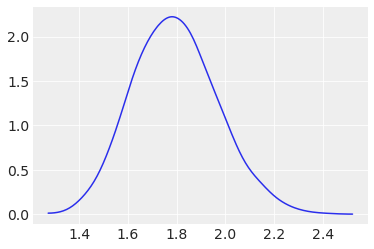

In [5]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos);

We will not get the same result if the values being multiplied are too large:

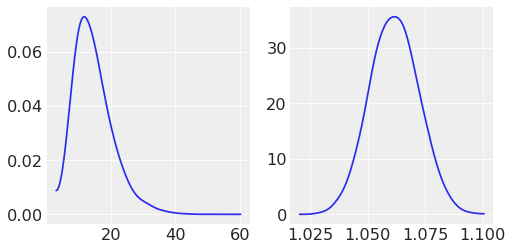

In [6]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1]);

## Log-multiplication

We also get a normal distribution if we take the logarithm of the results of multiplying random values. The reason is that the logarithm of a product is the sum of the logarithms of the original numbers -- bringing us back to the original, addition process for producing normal distributions.

Another way of stating this is to say that **the result of the multiplication process is a normal distribution "on the log scale"**.

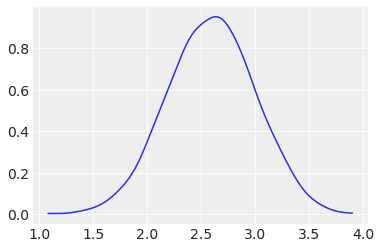

In [7]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(log_big);

We have seen three processes that produce normal distributions. This should make them less mysterious. When we find a normal distribution we may *hypothesize* that such an underlying process exists. But, to repeat myself, we have not shown that these are the only ways to get a normal distribution. Another inference, valid this time, is that if a distribution is *not* normal, it cannot be the result of one of the above processes. But again, this leaves open many possibilites.

Before moving on, it's worthwhile to consider what we gain by understanding that a phenomenon of interest is normally distributed, beyond having a succinct description. Page discusses some key ideas. If something is normally distributed, it means that most of the data is around the mean.

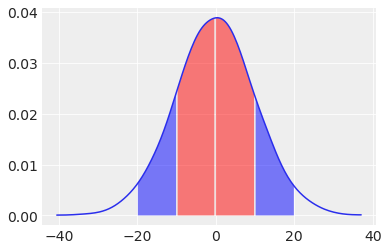

In [8]:
normal_data = np.random.normal(0,10,10000)
ax = az.plot_kde(normal_data)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = (x > 0) & (x < 10)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='red')
x, y = line.get_data()
mask = (x > -10) & (x < 0)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='red')
x, y = line.get_data()
mask = (x > 10) & (x < 20)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='blue')
x, y = line.get_data()
mask = (x > -20) & (x < -10)
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor='blue');

A normal distribution is symmetric, with ~68% withhin one standard deviation from the mean (within the red region in the graph). ~95% of the data is within two standard deviations from the mean (within the red and blue regions), and more than 99% is within three standard deviations.

As Page explains, social scientists use this fact to reject the hypothesis that a hypothesized mean and an empricial mean are the same if they are more than two standard deviations apart.

The second idea Page discusses is perhaps more suprising. It is that exceptional outcomes are more common in small populations than in large ones. The reason is that the larger the number of variables we average, the smallar the standard deviation of the distribution that results from averaging ($\sigma_\mu=\sigma/ \sqrt N$).

Consider as an example average test scores of school children in different towns. In the simulations below, we will each time change the number of children being sampled (the underlying distribution stays the *same*!)
Notice what happens to the spread.

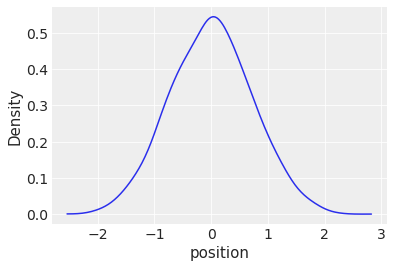

In [9]:
pos1 = np.random.uniform(-5, 5, size=(16, 5000)).mean(0)
az.plot_kde(pos1)
plt.xlabel('position')
plt.ylabel('Density');

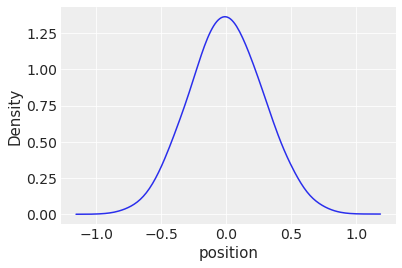

In [10]:
pos2 = np.random.uniform(-5, 5, size=(100, 5000)).mean(0)
az.plot_kde(pos2)
plt.xlabel('position')
plt.ylabel('Density');

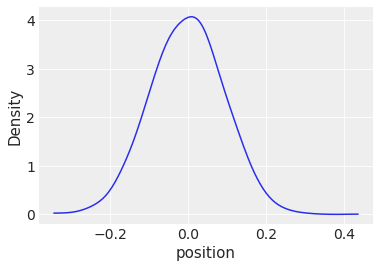

In [11]:
pos3 = np.random.uniform(-5, 5, size=(1000, 5000)).mean(0)
az.plot_kde(pos3)
plt.xlabel('position')
plt.ylabel('Density');

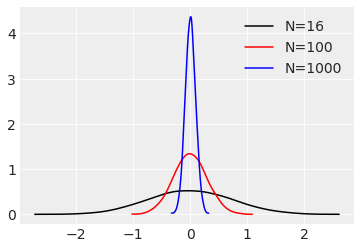

In [12]:
pos1 = np.random.uniform(-5, 5, size=(16, 5000)).mean(0)
pos2 = np.random.uniform(-5, 5, size=(100, 5000)).mean(0)
pos3 = np.random.uniform(-5, 5, size=(1000, 5000)).mean(0)
ax1=az.plot_kde(pos1)
ax2=az.plot_kde(pos2)
ax3=az.plot_kde(pos3)
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[0].set_label("N=16")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[1].set_label("N=100")
plt.gca().get_lines()[2].set_color("blue")
plt.gca().get_lines()[2].set_label("N=1000")
plt.legend();

In other words, when we look at the average, the larger the population size the smaller the standard deviation. If we look at averages, we should expect exceptional results the smaller the sample population. Put differently, once more, exceptional values, far from the true mean, are more likely, the smaller the population. For example, schools with 16 students will be much more likley to be much better or much worse than the mean, compared to schools with a 1000 students.

Now look what happens we look at the sum of the random variables.

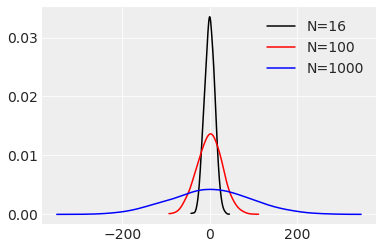

In [13]:
pos1 = np.random.uniform(-5, 5, size=(16, 5000)).sum(0)
pos2 = np.random.uniform(-5, 5, size=(100, 5000)).sum(0)
pos3 = np.random.uniform(-5, 5, size=(1000, 5000)).sum(0)
az.plot_kde(pos1)
az.plot_kde(pos2)
az.plot_kde(pos3)
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[2].set_color("blue")
plt.gca().get_lines()[0].set_label("N=16")
plt.gca().get_lines()[1].set_label("N=100")
plt.gca().get_lines()[2].set_label("N=1000")
plt.legend();

This is the opposite ordering from before because $\sigma_\Sigma=\sigma \sqrt N$.

# Thinking with data

An altogether different modeling scenario arises when we have actual data. Let's consider a situation in which we have data on heights in some population (see McElreath, sec. 4.3). What I want to emphasize for now is that while, just like before, we will have a normal distribution, we will be trying to do very different things with it. 

We will now be working with actual data for the Dobe area !Kung San, compiled from interviews conducted by Nancy Howell in the late 1960s. This time we don't start with a simulation; we start by reading in the data file.

In [14]:
d = pd.read_csv('Howell1.csv', sep=';', header=0)
d.head()
print (len(d))

544


Let's first compare four distributions: the entire population; just adults; and adults split according the sex.

In [15]:
d_adults = d[d.age >= 18]
d_males = d[(d.age >=18) & (d.male == 1)]
d_females = d[(d.age >=18) & (d.male == 0)]

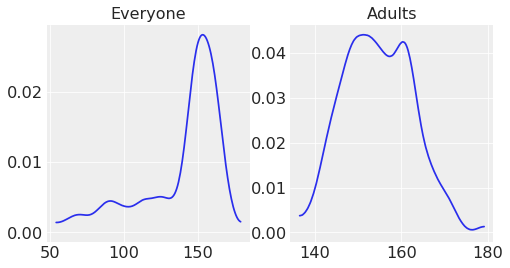

In [16]:
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(d.height, ax=ax[0])
az.plot_kde(d_adults.height, ax=ax[1])
ax[0].set_title("Everyone")
ax[1].set_title("Adults");

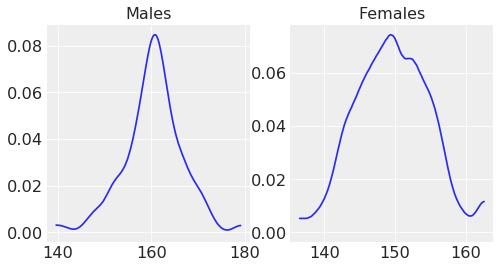

In [17]:
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(d_males.height, ax=ax[0])
az.plot_kde(d_females.height, ax=ax[1]);
ax[0].set_title("Males")
ax[1].set_title("Females");

If you squint, the adult distribution looks kinda normal (but see McElreath for cautionary notes). What we want to do is to determine (estimate) the mean and standard deviation of the population given these data and the assumption that the distribution is normal.(Keep in mind the distinction between estimating these values for the data, and getting an good estimate of the values for the entire population based on the sample values that we have.) 

This situation is rather different than the one we had before. For one, the model here is a statistical model (namely, the normal distribution), not micro-level process that produces the stastistical phenomenon. But it is perhaps more important to consider the types of uses (for example, the types of questions) that the models are put to in each case. 

The task of finding the best parameter values is sometimes referred to as model fitting. This term might help convey the gist of what we are doing: estimating the parameters of the model given the data. Given some asumptions we can actually find the most probable (mean, s.d) values given these data. This can be framed as a problem of Bayesian inference, and I will not go into the details here.

(We discussed Bayesian inference elsewhere. For the very basics see [here](https://github.com/ehud/Notes/blob/master/Probability.ipynb). For a more thourough discussion see McElreath, chp. 2 & 3 or Gelman, Andrew et al. 2013. *Bayesian Data Analysis*. 3 edition. Boca Raton: Chapman and Hall/CRC, chp. 1 & 2).  

In [18]:
import pymc3 as pm

In [19]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d_adults.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d_adults.height.std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d_adults.height)
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains, 0 divergences: 100%|█| 4000/4000 [00:04<00:00, 931.97draws/s


C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


,mean,sd,hpd_44.5%,hpd_55.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,154.61,0.41,154.57,154.68,0.01,0.01,1925.0,1925.0,1934.0,1573.0,1.0
sigma,7.78,0.30,7.67,7.75,0.01,0.00,1693.0,1687.0,1701.0,1327.0,1.0


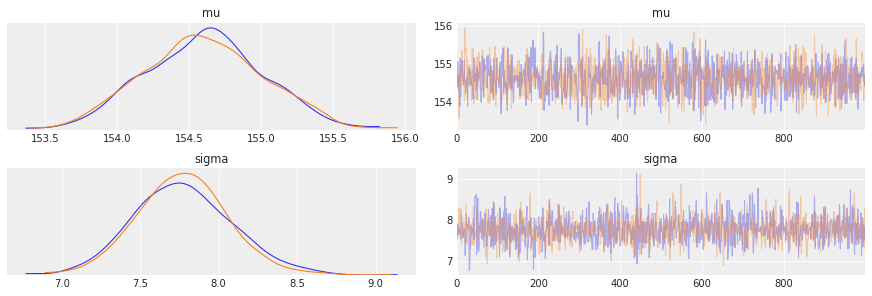

In [20]:
az.plot_trace(trace_4_1); 
az.summary(trace_4_1, credible_interval=.11).round(2)

It is important to understand what is going on here. We started with data that seemed (roughly) normally distributed. We then *assumed* a normal distribution (a statistical model) and fitted it to the data (that is, we estimated the the mean and standard deviation *for the normal model* that would make it match the data best). 

While models of the kind discussed in the beginning may ultimately be used to make predictions about the world, then to be checked by relating the results to empirical data, this need not be the case. But first, consider what might be involved if one does try to do that. We may find it enough sometimes to say that a process model that produces a normal distribution is to some degree supported by observing that actual data is normally distributed. But we have seen that this is very weak support, if any (many models may produce similar results). Given that the model in general does not include all causes that affect the outcome (some people may be short because of disease or accident) and that samples are small and measurement noisy, we should not expect perfect fit of model to data even if the causal model can be calibrated by estimating its parameters (which the simple additive model etc. we discussed was certainly not). Notice that building a model that can be fitted to data in this way requires different skills and is perhaps more difficult than the conceptual models we discussed. Calibrating the parameters of a micro-level model based on macro-level observations is typically impossible.

McElreath has a useful discussion of the many-to-many relationship  between hypotheses, process models, and statistical models in sec. 1.2.1 of *Statistical Rethinking* which is worth reading in full  (I borrowed the terminology used here from him).

More fundamentally, the two cases have different goals, that typically conflict. On the conceptual side, when we want to show how something might be possible, to find a minimal set of assumptions that may produce a kind of behavior we find intriguing and hard to explain, or more generally to gain qualitative understanding of the behavior of complex systems -- in all these cases we would prefer simple, toy models. Making them more 'realistic' in the sense of being more amenable to a data driven workflow of model fitting, comparison, and choice, would often be to miss the point of having such models to begin with. However, we should be clear-eyed about what we can expect such models to tell us.

# Cultural Transmission and the Diffusion of Innovations

As a final example we will look at one model from the following paper:

Henrich, Joseph. 2001. “Cultural Transmission and the Diffusion of Innovations: AdoptionDynamics Indicate That Biased Cultural Transmission Is the Predominate Force in Behavioral Change.” American Anthropologist 103 (4): 992–1013. https://doi.org/10.1525/aa.2001.103.4.992.

The paper studies how cultural innovations spread. It is a very interesting paper, so I urge you to go read it for yourself. The paper begins with the well documented observation that most cultural innovations have an S-shaped adoption curve. Simply put, this means that spread is initially slow, at some point it becomes fast, and finally as the population becomes saturated with the new idea the rate slows down again. (This is the same dyanmic we have seen in the diffusion model of infectious diseases, see [here](https://github.com/ehud/Notes/blob/master/SIS-Model.ipynb).)

Henrich is interested in models that result in an S-curve as opposed to models that lead to an r-curve, that attain their maximal rate of growth immediately. The r-curve may result from non-social learning. One of models he studies is the biased cultural transmission model, which for example captures cases of conformism. The frequency of the innovation will change over time according to the following formula (with q' being the frequency in the next time step, given the frequency q in the current time step):

$q'=q+q(1-q)B$ (this is eq. 3 in the paper)

(I'm not going to derive this equation. Essentially for transmission we need a carrier (q) to meet a non-carrier (1-q) of the trait; B is rate of transmission.)

We can easily simulate the dynamics this equation gives rise to (B has to be between -1 and 1). 


In [22]:
B = 0.1
q0 = 0.01  # initial value of q
qs = [q0]   # list of the value of q at each time step
for i in range(100):
    q0 = qs[-1] # take the last element from the list, this is the current value of q
    qs.append(q0+q0*(1- q0)*B)  # add the new value (q') to the end of the list

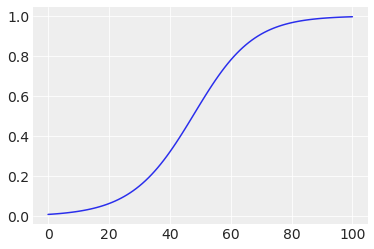

In [23]:
plt.plot(qs);

As this simulation shows, biased transmission produces an S-curve (compare this result with figure 4 in the paper). Individual learning produces an r-curve. Based on such considerations Henrich concludes that "biased cultural transmission processes are much more important to understanding the diffusion of innovations and sociocultural evolution than is often assumed by most theorists." 

# Getting a wee bit crazy

Let's produce values using the additive process we began with, and then fit a Normal Distribution model on them to check the result!

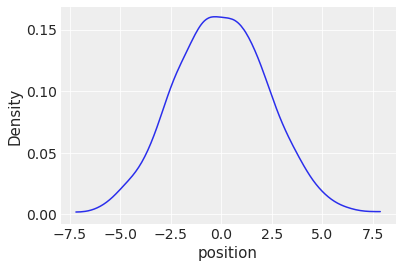

In [24]:
pos_data = np.random.uniform(-1, 1, size=(16, 3000)).sum(0)
az.plot_kde(pos_data)
plt.xlabel('position')
plt.ylabel('Density');

In [25]:
with pm.Model() as just_being_crazy_here:
    mu = pm.Normal('mu', mu=0, sd=2, testval=pos_data.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=5, testval=pos_data.std())
    height = pm.Normal('pos', mu=mu, sd=sigma, observed=pos_data)
    trace_crazy_pants = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains, 0 divergences: 100%|█| 4000/4000 [00:04<00:00, 848.86draws/s


C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\minconda2\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


,mean,sd,hpd_44.5%,hpd_55.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.00,0.04,-0.00,0.01,0.0,0.0,1679.0,1062.0,1685.0,1301.0,1.0
sigma,2.32,0.03,2.31,2.31,0.0,0.0,1973.0,1968.0,1977.0,1308.0,1.0


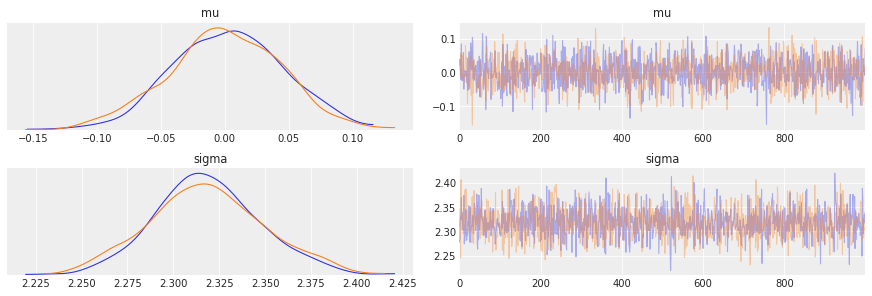

In [26]:
az.plot_trace(trace_crazy_pants); 
az.summary(trace_crazy_pants, credible_interval=.11).round(2)

We will now draw numbers from a normal distribution with mean and standard deviation based on the model (we use the mean values of the parameters in the results of the previous stage). 
We then compare this to the data, in other words, with the results of the additive process.

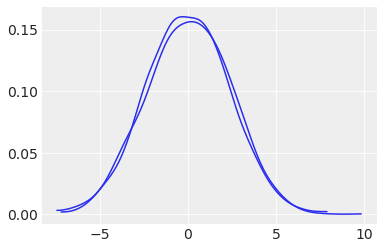

In [27]:
normal_data = np.random.normal(trace_crazy_pants['mu'].mean(),trace_crazy_pants['sigma'].mean(),3000)
az.plot_kde(pos_data)
az.plot_kde(normal_data);

Not bad!